## Dataset Description

### Overview
* The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## Analysis Content 
* 1.[Python Libraries](#1)
* 2.[data loading](#2)
* 3.[EDA](#3)
* 4.[data Preprocessing](#4)
* 5.[Modelling](#5) 
* 6.[Randomforest](#6) 
* 7.[GBM](#7) 
* 8.[LGBM](#8) 
* 9.[Conclusion](#9)


<a id="1"></a>
## 1.Python Libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## 2.Data Loading

In [3]:
train=pd.read_csv("train (1).csv")  #train file
test=pd.read_csv("test (1).csv")  #test file

In [4]:
#training data
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#train data end 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<a id="3"></a>
## 3.EDA

In [8]:
# for train EDA

In [9]:
train.shape

(891, 12)

In [10]:
#  the training dataset consists of 891 observations and 12 attributes

In [11]:
# train columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
#convert the columns to lowercase only
train.columns=train.columns.str.lower()

In [13]:
train.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [14]:
#checking the data types

train.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

In [15]:
# remove unnecessary columns from dataset

In [16]:
train.drop(["passengerid","name","ticket","cabin"],axis=1,inplace=True)

In [17]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
#train structural information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB




*  Our training dataset consists of 6 numeric and 2 categorical variables with extracted columns. 

In [19]:
# train describe
train.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [20]:
train.describe([0, 0.05,0.2, 0.50, 0.75,0.9]).T

,count,mean,std,min,0%,5%,20%,50%,75%,90%,max
survived,891.0,0.383838,0.486592,0.00,0.00,0.000,0.0000,0.0000,1.0,1.0000,1.0000
pclass,891.0,2.308642,0.836071,1.00,1.00,1.000,1.0000,3.0000,3.0,3.0000,3.0000
age,714.0,29.699118,14.526497,0.42,0.42,4.000,19.0000,28.0000,38.0,50.0000,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.00,0.000,0.0000,0.0000,1.0,1.0000,8.0000
parch,891.0,0.381594,0.806057,0.00,0.00,0.000,0.0000,0.0000,0.0,2.0000,6.0000
fare,891.0,32.204208,49.693429,0.00,0.00,7.225,7.8542,14.4542,31.0,77.9583,512.3292


In [21]:
train.columns.unique()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [22]:
# train unique value counts
for i in train.columns:
    print("unique value counts:",i,":",train[i].nunique())

unique value counts: survived : 2
unique value counts: pclass : 3
unique value counts: sex : 2
unique value counts: age : 88
unique value counts: sibsp : 7
unique value counts: parch : 7
unique value counts: fare : 248
unique value counts: embarked : 3


In [23]:
col=["survived","pclass","sex","sibsp","parch","embarked"]

for i in col:
    print(train[i].value_counts())
   


0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64




### training dataset General Inference
* more survivors (549), more from third class (lower class), more men on board, family relations divided into 6 different categories, most passengers boarded from Southampton port

In [24]:
# fix missing values for training dataset

In [25]:
train.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [26]:
# Let's look at the distribution of the data for the age variable

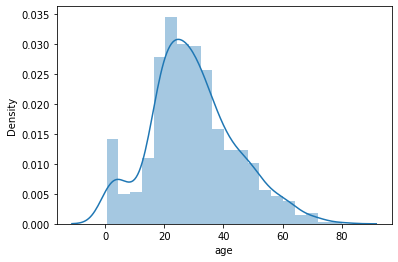

In [27]:
sns.distplot(train.age)


* let's fill the null values with 30, which is densely dispersed in the 20-40 band of the data.

In [28]:
train.age.fillna(value=30,inplace=True)

In [29]:
train.age.isna().sum()

0

In [30]:
train[train.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [31]:
train.iloc[58:66]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
58,1,2,female,5.0,1,2,27.7500,S
59,0,3,male,11.0,5,2,46.9000,S
60,0,3,male,22.0,0,0,7.2292,C
61,1,1,female,38.0,0,0,80.0000,NaN
62,0,1,male,45.0,1,0,83.4750,S
63,0,3,male,4.0,3,2,27.9000,S
64,0,1,male,30.0,0,0,27.7208,C
65,1,3,male,30.0,1,1,15.2458,C


In [32]:
train.iloc[827:832]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
827,1,2,male,1.00,0,2,37.0042,C
828,1,3,male,30.00,0,0,7.7500,Q
829,1,1,female,62.00,0,0,80.0000,NaN
830,1,3,female,15.00,1,0,14.4542,C
831,1,2,male,0.83,1,1,18.7500,S


In [33]:
# fill with the value that comes after it
train.embarked.fillna(method ="ffill",inplace=True)

In [34]:
train.embarked.isna().sum()

0

In [35]:
# let's take a look at the oldest-youngest passengers in the training dataset (10)

In [36]:
train.sort_values("age",ascending=False).head(15) # oldest

,survived,pclass,sex,age,sibsp,parch,fare,embarked
630,1,1,male,80.0,0,0,30.0000,S
851,0,3,male,74.0,0,0,7.7750,S
96,0,1,male,71.0,0,0,34.6542,C
493,0,1,male,71.0,0,0,49.5042,C
116,0,3,male,70.5,0,0,7.7500,Q
672,0,2,male,70.0,0,0,10.5000,S
745,0,1,male,70.0,1,1,71.0000,S
33,0,2,male,66.0,0,0,10.5000,S
456,0,1,male,65.0,0,0,26.5500,S
54,0,1,male,65.0,0,1,61.9792,C


In [37]:
train.sort_values("age",ascending=True).head(15) # youngest

,survived,pclass,sex,age,sibsp,parch,fare,embarked
803,1,3,male,0.42,0,1,8.5167,C
755,1,2,male,0.67,1,1,14.5000,S
644,1,3,female,0.75,2,1,19.2583,C
469,1,3,female,0.75,2,1,19.2583,C
831,1,2,male,0.83,1,1,18.7500,S
78,1,2,male,0.83,0,2,29.0000,S
305,1,1,male,0.92,1,2,151.5500,S
164,0,3,male,1.00,4,1,39.6875,S
827,1,2,male,1.00,0,2,37.0042,C
172,1,3,female,1.00,1,1,11.1333,S


In [38]:
# youngest passenger 0.42 ie 4-5 months old baby, oldest 80 years old

In [39]:
#fare price
train.sort_values("fare",ascending=False).head(15) #most 15

,survived,pclass,sex,age,sibsp,parch,fare,embarked
258,1,1,female,35.0,0,0,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
88,1,1,female,23.0,3,2,263.0000,S
27,0,1,male,19.0,3,2,263.0000,S
341,1,1,female,24.0,3,2,263.0000,S
438,0,1,male,64.0,1,4,263.0000,S
311,1,1,female,18.0,2,2,262.3750,C
742,1,1,female,21.0,2,2,262.3750,C
118,0,1,male,24.0,0,1,247.5208,C


In [40]:
train.sort_values("fare",ascending=True).head(10) #least 15

,survived,pclass,sex,age,sibsp,parch,fare,embarked
271,1,3,male,25.0,0,0,0.0,S
597,0,3,male,49.0,0,0,0.0,S
302,0,3,male,19.0,0,0,0.0,S
633,0,1,male,30.0,0,0,0.0,S
277,0,2,male,30.0,0,0,0.0,S
413,0,2,male,30.0,0,0,0.0,S
674,0,2,male,30.0,0,0,0.0,S
263,0,1,male,40.0,0,0,0.0,S
466,0,2,male,30.0,0,0,0.0,S
732,0,2,male,30.0,0,0,0.0,S


In [41]:
# some passengers board for free, the maximum payment is 512.3292

In [42]:
# embarked for describe(train dataset)
train.groupby("embarked").describe().T

embarked                 C          Q           S
survived count  169.000000  78.000000  644.000000
         mean     0.556213   0.397436    0.336957
         std      0.498307   0.492535    0.473037
         min      0.000000   0.000000    0.000000
         25%      0.000000   0.000000    0.000000
         50%      1.000000   0.000000    0.000000
         75%      1.000000   1.000000    1.000000
         max      1.000000   1.000000    1.000000
pclass   count  169.000000  78.000000  644.000000
         mean     1.881657   2.884615    2.350932
         std      0.943755   0.425815    0.789402
         min      1.000000   1.000000    1.000000
         25%      1.000000   3.000000    2.000000
         50%      1.000000   3.000000    3.000000
         75%      3.000000   3.000000    3.000000
         max      3.000000   3.000000    3.000000
age      count  169.000000  78.000000  644.000000
         mean    30.674083  29.724359   29.522904
         std     13.541341  10.718247   13.117506
         min      0.420000   2.000000    0.670000
         25%     23.500000  30.000000   22.000000
         50%     30.000000  30.000000   30.000000
         75%     36.000000  30.000000   36.000000
         max     71.000000  70.500000   80.000000
sibsp    count  169.000000  78.000000  644.000000
         mean     0.384615   0.423077    0.571429
         std      0.556349   0.973936    1.216600
         min      0.000000   0.000000    0.000000
         25%      0.000000   0.000000    0.000000
         50%      0.000000   0.000000    0.000000
         75%      1.000000   0.000000    1.000000
         max      2.000000   4.000000    8.000000
parch    count  169.000000  78.000000  644.000000
         mean     0.360947   0.166667    0.413043
         std      0.659104   0.652998    0.853253
         min      0.000000   0.000000    0.000000
         25%      0.000000   0.000000    0.000000
         50%      0.000000   0.000000    0.000000
         75%      1.000000   0.000000    0.000000
         max      3.000000   5.000000    6.000000
fare     count  169.000000  78.000000  644.000000
         mean    60.072759  14.131465   27.079812
         std     83.677089  15.992637   35.887993
         min      4.012500   6.750000    0.000000
         25%     13.791700   7.750000    8.050000
         50%     29.700000   7.750000   13.000000
         75%     79.200000  15.500000   27.900000
         max    512.329200  90.000000  263.000000

In [43]:
# sex for describe(train dataset)

train.groupby("sex").describe().T

sex                 female        male
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
age      count  314.000000  577.000000
         mean    28.267516   30.570485
         std     12.883901   13.006049
         min      0.750000    0.420000
         25%     21.000000   23.000000
         50%     30.000000   30.000000
         75%     35.000000   35.000000
         max     63.000000   80.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200



* by examining these statistics, we can make various inferences according to gender, place of boarding, for example, survival of women is very high, while that of men is very low, etc.


In [44]:
### for TEST EDA

In [45]:
test.shape

(418, 11)

In [46]:
# test dataset consists of 418 observations and 11 features

In [47]:
# test columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
#convert the colons to lowercase;

test.columns=test.columns.str.lower()

In [49]:
test.head(3)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [50]:
# remove unnecessary columns from dataset
test.drop(["name","ticket","cabin","passengerid"],axis=1,inplace=True)

In [51]:
test.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [52]:
#test structural information

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    418 non-null    int64  
 1   sex       418 non-null    object 
 2   age       332 non-null    float64
 3   sibsp     418 non-null    int64  
 4   parch     418 non-null    int64  
 5   fare      417 non-null    float64
 6   embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB




* Our dataset consists of 5 numeric and 2 categorical variables with extracted columns. 

In [53]:
# test describe
test.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.0,3.0000
age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.0,76.0000
sibsp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.0,8.0000
parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.0,9.0000
fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292


In [54]:
test.describe([0, 0.05,0.2, 0.50, 0.75,0.9]).T

,count,mean,std,min,0%,5%,20%,50%,75%,90%,max
pclass,418.0,2.265550,0.841838,1.00,1.00,1.0000,1.0000,3.0000,3.0,3.0,3.0000
age,332.0,30.272590,14.181209,0.17,0.17,8.0000,20.0000,27.0000,39.0,50.0,76.0000
sibsp,418.0,0.447368,0.896760,0.00,0.00,0.0000,0.0000,0.0000,1.0,1.0,8.0000
parch,418.0,0.392344,0.981429,0.00,0.00,0.0000,0.0000,0.0000,0.0,1.3,9.0000
fare,417.0,35.627188,55.907576,0.00,0.00,7.2292,7.7958,14.4542,31.5,79.2,512.3292


In [55]:
# test unique value counts
for i in test.columns:
    print("unique value counts:",i,":",test[i].nunique())

unique value counts: pclass : 3
unique value counts: sex : 2
unique value counts: age : 79
unique value counts: sibsp : 7
unique value counts: parch : 8
unique value counts: fare : 169
unique value counts: embarked : 3


In [56]:
col2=["pclass","sex","sibsp","parch","embarked"]

for i in col2:
    print(test[i].value_counts())
    


3    218
1    107
2     93
Name: pclass, dtype: int64
male      266
female    152
Name: sex, dtype: int64
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: sibsp, dtype: int64
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: parch, dtype: int64
S    270
C    102
Q     46
Name: embarked, dtype: int64



### test dataset General Inference;
* 3 more classes (lower class), more men on board, family relations divided into 6 different categories, most of the passengers boarded from Southampton port

In [57]:
# fix missing values for test dataset

In [58]:
test.isna().sum()

pclass       0
sex          0
age         86
sibsp        0
parch        0
fare         1
embarked     0
dtype: int64

In [59]:
# missing values in age and salary columns, look at distributions

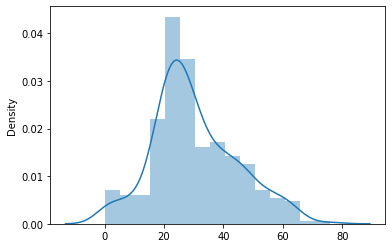

In [60]:
sns.distplot(x=test.age)

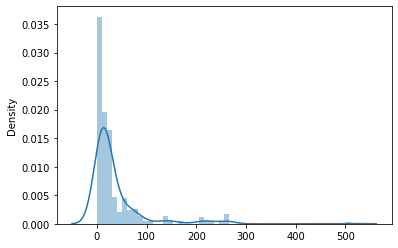

In [61]:
sns.distplot(x=test.fare)

In [62]:
test.age.mean()

30.272590361445783

In [63]:
# age and fare
test.age.fillna(value=30,inplace=True)
test.fare.fillna(value=35,inplace=True)

In [64]:
test.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [65]:
test.sort_values("age",ascending=False).head(10) # oldest

,pclass,sex,age,sibsp,parch,fare,embarked
96,1,female,76.0,1,0,78.8500,S
81,1,male,67.0,1,0,221.7792,S
236,1,male,64.0,1,0,75.2500,C
305,1,female,64.0,1,1,26.5500,S
179,1,female,64.0,0,2,83.1583,C
114,1,female,63.0,1,0,221.7792,S
13,2,male,63.0,1,0,26.0000,S
2,2,male,62.0,0,0,9.6875,Q
193,2,male,61.0,0,0,12.3500,Q
142,1,male,61.0,1,3,262.3750,C


In [66]:
test.sort_values("age",ascending=True).head(10) # youngest

,pclass,sex,age,sibsp,parch,fare,embarked
354,3,female,0.17,1,2,20.5750,S
201,3,male,0.33,0,2,14.4000,S
281,3,male,0.75,1,1,13.7750,S
307,3,male,0.83,0,1,9.3500,S
250,2,female,0.92,1,2,27.7500,S
263,3,female,1.00,1,1,12.1833,S
296,2,female,1.00,1,2,41.5792,C
117,3,female,1.00,1,1,16.7000,S
284,3,female,2.00,1,1,20.2125,S
89,2,male,2.00,1,1,23.0000,S


In [67]:
# youngest passenger 0.17 ie 2-3 months old baby, oldest 76 years old

In [68]:
# Let's look at the paid fees

In [69]:
test.sort_values("fare",ascending=False).head(10) #most 10

,pclass,sex,age,sibsp,parch,fare,embarked
343,1,female,58.0,0,1,512.3292,C
53,1,female,28.0,3,2,263.0000,S
69,1,female,60.0,1,4,263.0000,S
375,1,female,45.0,0,0,262.3750,C
59,1,female,36.0,0,0,262.3750,C
64,1,male,13.0,2,2,262.3750,C
24,1,female,48.0,1,3,262.3750,C
142,1,male,61.0,1,3,262.3750,C
184,1,female,27.0,1,1,247.5208,C
202,1,male,47.0,1,0,227.5250,C


In [70]:
test.sort_values("fare",ascending=True).head(10) #least 10

,pclass,sex,age,sibsp,parch,fare,embarked
372,1,male,49.0,0,0,0.0000,S
266,1,male,30.0,0,0,0.0000,S
21,3,male,9.0,0,1,3.1708,S
133,3,male,30.0,1,0,6.4375,C
116,3,male,30.0,0,0,6.4375,C
232,3,male,21.0,1,0,6.4958,S
291,3,female,30.0,0,0,6.9500,Q
1,3,female,47.0,1,0,7.0000,S
163,3,male,30.0,0,0,7.0000,S
211,3,male,30.0,0,0,7.0500,S


In [71]:
# some passengers board for free, the maximum payment is 512.3292

In [72]:
# embarked for describe(test dataset)

test.groupby("embarked").describe().T

embarked               C          Q           S
pclass count  102.000000  46.000000  270.000000
       mean     1.794118   2.869565    2.340741
       std      0.926382   0.400483    0.772799
       min      1.000000   1.000000    1.000000
       25%      1.000000   3.000000    2.000000
       50%      1.000000   3.000000    3.000000
       75%      3.000000   3.000000    3.000000
       max      3.000000   3.000000    3.000000
age    count  102.000000  46.000000  270.000000
       mean    33.808824  29.673913   28.951852
       std     13.341487   8.632765   12.713399
       min      1.000000  10.000000    0.170000
       25%     26.125000  27.750000   22.000000
       50%     30.000000  30.000000   29.000000
       75%     45.000000  30.000000   32.875000
       max     64.000000  62.000000   76.000000
sibsp  count  102.000000  46.000000  270.000000
       mean     0.421569   0.195652    0.500000
       std      0.552873   0.687008    1.019330
       min      0.000000   0.000000    0.000000
       25%      0.000000   0.000000    0.000000
       50%      0.000000   0.000000    0.000000
       75%      1.000000   0.000000    1.000000
       max      2.000000   4.000000    8.000000
parch  count  102.000000  46.000000  270.000000
       mean     0.382353   0.021739    0.459259
       std      0.690015   0.147442    1.132573
       min      0.000000   0.000000    0.000000
       25%      0.000000   0.000000    0.000000
       50%      0.000000   0.000000    0.000000
       75%      1.000000   0.000000    0.000000
       max      3.000000   1.000000    9.000000
fare   count  102.000000  46.000000  270.000000
       mean    66.259765  10.957700   28.255509
       std     84.901989  12.618385   39.827055
       min      6.437500   6.950000    0.000000
       25%     13.859350   7.750000    8.050000
       50%     27.720800   7.750000   13.837500
       75%     78.472925   7.879200   26.550000
       max    512.329200  90.000000  263.000000

In [73]:
# sex for describe(train dataset)

test.groupby("sex").describe().T

sex               female        male
pclass count  152.000000  266.000000
       mean     2.144737    2.334586
       std      0.887051    0.808497
       min      1.000000    1.000000
       25%      1.000000    2.000000
       50%      2.000000    3.000000
       75%      3.000000    3.000000
       max      3.000000    3.000000
age    count  152.000000  266.000000
       mean    30.227566   30.210188
       std     14.094021   11.748385
       min      0.170000    0.330000
       25%     22.000000   24.000000
       50%     30.000000   30.000000
       75%     36.000000   34.375000
       max     76.000000   67.000000
sibsp  count  152.000000  266.000000
       mean     0.565789    0.379699
       std      0.974313    0.843735
       min      0.000000    0.000000
       25%      0.000000    0.000000
       50%      0.000000    0.000000
       75%      1.000000    1.000000
       max      8.000000    8.000000
parch  count  152.000000  266.000000
       mean     0.598684    0.274436
       std      1.105434    0.883745
       min      0.000000    0.000000
       25%      0.000000    0.000000
       50%      0.000000    0.000000
       75%      1.000000    0.000000
       max      9.000000    9.000000
fare   count  152.000000  266.000000
       mean    49.747699   27.555968
       std     73.108716   41.004401
       min      6.950000    0.000000
       25%      8.626050    7.854200
       50%     21.512500   13.000000
       75%     55.441700   26.550000
       max    512.329200  262.375000

<a id="4"></a>
## 4.Data Preprocessing

###  for training data 

In [74]:
# create lists for numeric and categorical values
tr_cat_list=[]
tr_num_list=[]

for i in train.columns:
    unique_val=len(train[i].unique())
    
    if unique_val<10:
        tr_cat_list.append(i)
    else:
        tr_num_list.append(i)

In [75]:
tr_cat_list

['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked']

In [76]:
tr_num_list

['age', 'fare']

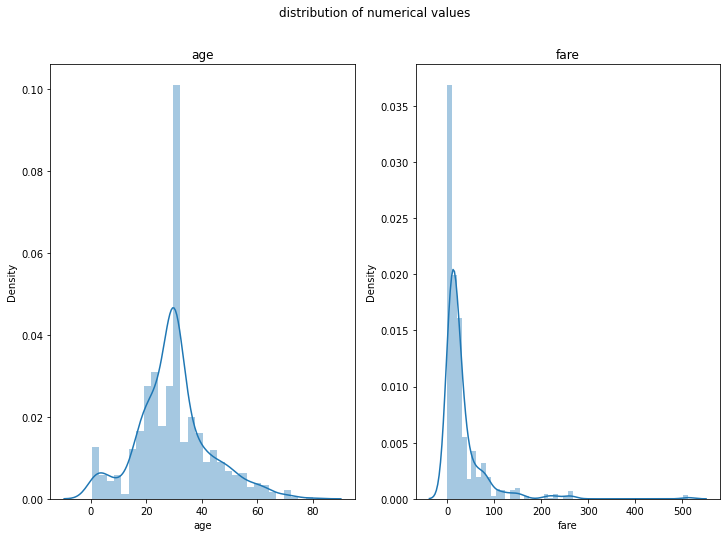

In [77]:
# look at the distribution states of our numeric variable
k=1
plt.figure(figsize=(12,8))
plt.tight_layout()
plt.suptitle("distribution of numerical values")
for i in train.loc[:,tr_num_list]:
    plt.subplot(1,2,k)   
    sns.distplot(train[i])
    plt.title(i)
    k+=1

In [78]:
# Let's look at the outlier with boxplot, then interpret it

for i in train.loc[:,tr_num_list]:
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if train[(train[i] > up) | (train[i] < low)].any(axis=None):
        print(i, "yes")
    else:
        print(i, "no")


age yes
fare yes


In [79]:
def outliers_train(data):
    q1,q3=np.percentile(data,[25,75])
    ıqr=q3-q1
    low,high=q1-1.5*(ıqr),q3+1.5*(ıqr)
    outliers_train=[i for i in data if i<low or i>high]
    return outliers_train

In [80]:
outliers_train(train["age"])

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

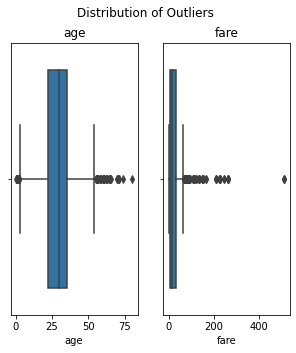

In [81]:
# visualize
k=1
plt.figure(figsize=(5,5))
plt.suptitle("Distribution of Outliers")

for i in train.loc[:,tr_num_list]:
    plt.subplot(1,2,k)
    sns.boxplot(x = i, data = train.loc[:,tr_num_list])
    plt.title(i)
    k+=1


* There are outliers in the age and the fare paid variable. but if we pay attention, for example, there is a class distinction, the upper class may be paying more fare. 
it may also be composed of very young and very old passengers. So, let's not eliminate the outliers.

### training data visualize

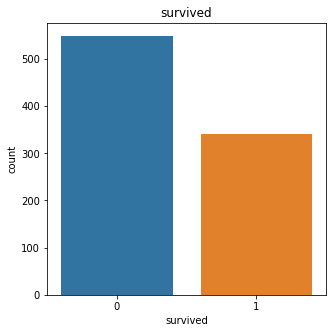

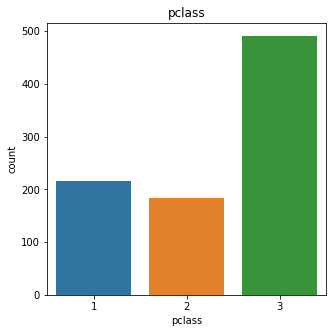

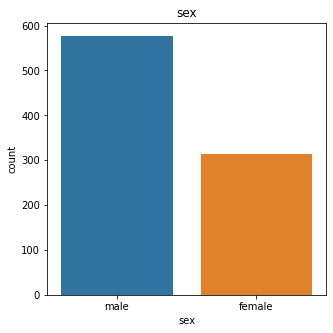

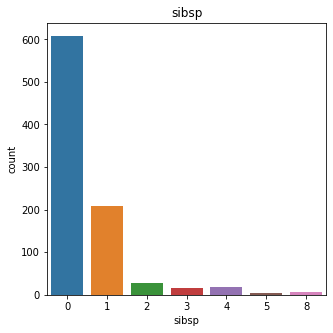

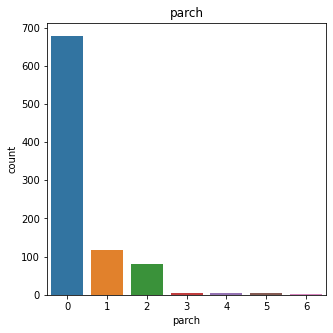

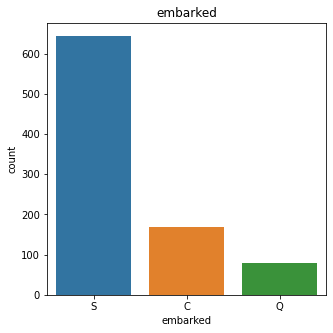

In [82]:
# categorial analysis
for i in tr_cat_list:
    
    plt.figure(figsize=(5,5))
    sns.countplot(x=i,data=train.loc[:,tr_cat_list])
    plt.title(i)

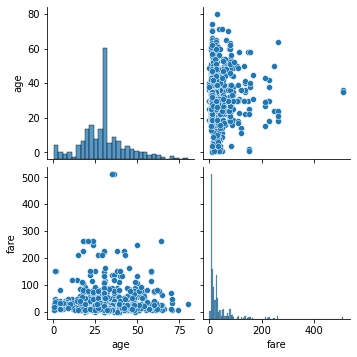

In [83]:
# numerical analysis
sns.pairplot(train.loc[:,tr_num_list])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba7966d520>,
      dtype=object)

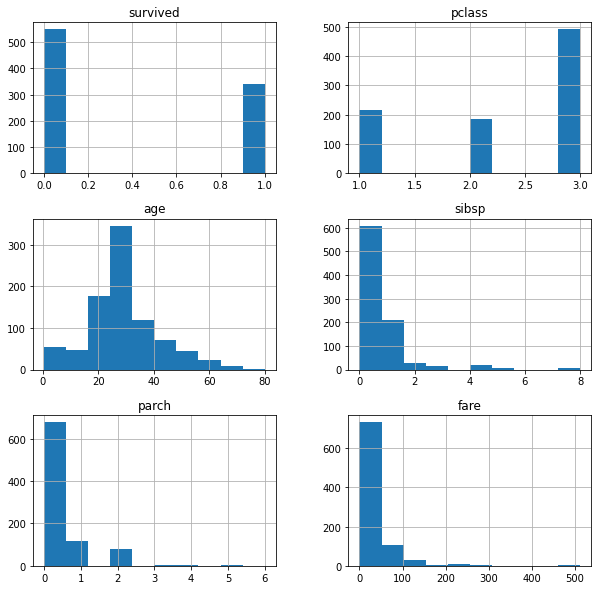

In [84]:
# histogram
train.hist(figsize=(10,10))

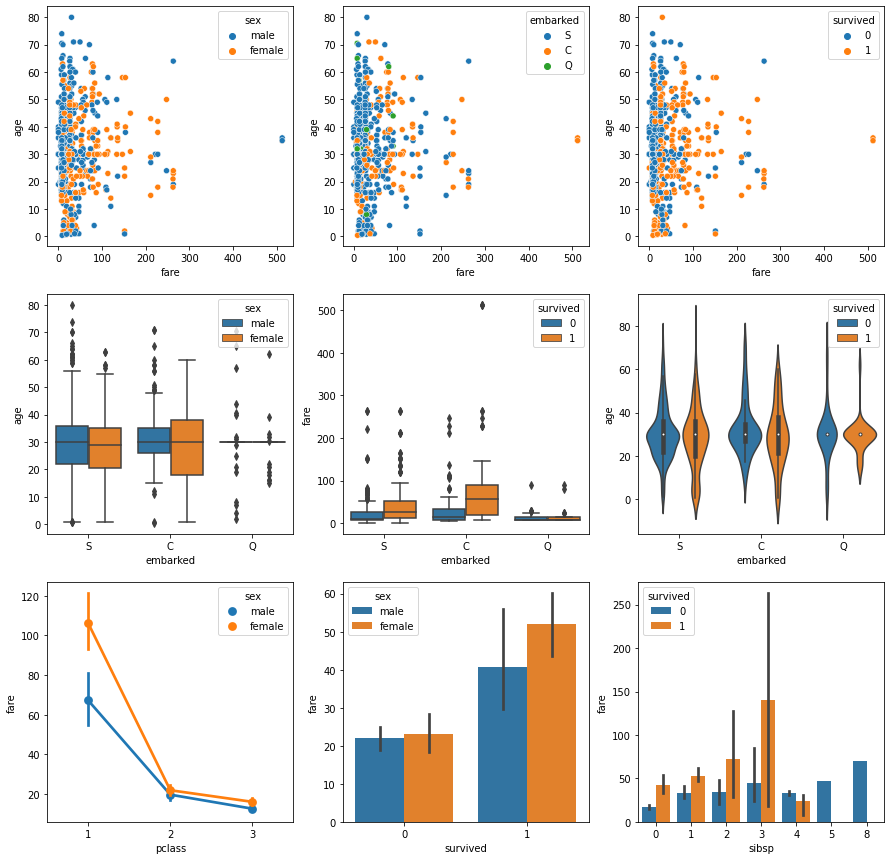

In [85]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='fare',y ='age',hue="sex",data = train)
plt.subplot(3,3,2)
sns.scatterplot(x="fare",y="age",hue="embarked",data=train)
plt.subplot(3,3,3)
sns.scatterplot(x="fare",y="age",hue="survived",data=train)
plt.subplot(3,3,4)
sns.boxplot(x ='embarked',y ='age',hue="sex",data = train)
plt.subplot(3,3,5)
sns.boxplot(x="embarked",y="fare",hue="survived",data=train)
plt.subplot(3,3,6)
sns.violinplot(x="embarked",y="age",hue="survived",data=train)
plt.subplot(3,3,7)
sns.pointplot(x ='pclass',y ='fare',hue="sex",data = train)
plt.subplot(3,3,8)
sns.barplot(x="survived",y="fare",hue="sex",data=train)
plt.subplot(3,3,9)
sns.barplot(x="sibsp",y="fare",hue="survived",data=train)
plt.show()

### encoding process for train

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
le=LabelEncoder()

In [88]:
train.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [89]:
train["sex"]=le.fit_transform(train["sex"])
train["embarked"]=le.fit_transform(train["embarked"])

In [90]:
train.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


### train data corelation Analysis

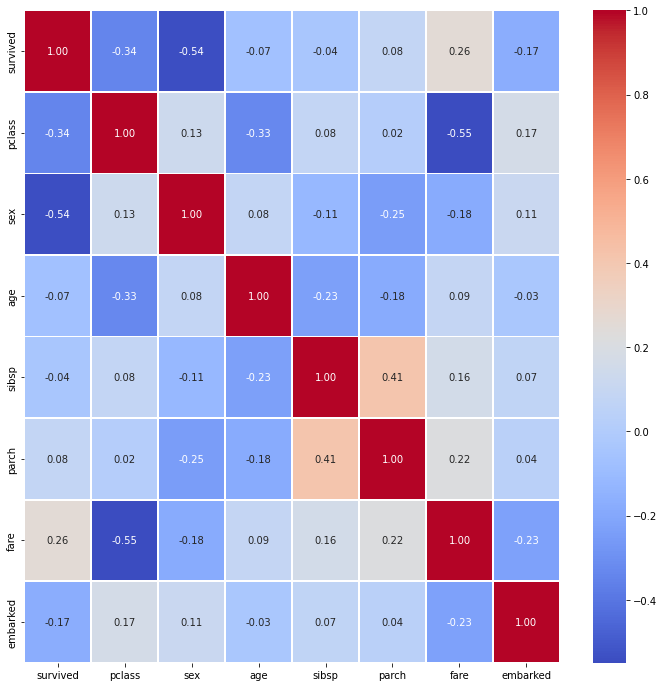

In [91]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [92]:
train.corr()["survived"].sort_values(ascending=False)


survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.070657
embarked   -0.172726
pclass     -0.338481
sex        -0.543351
Name: survived, dtype: float64

## test data preprocessing

In [93]:
# create lists for numeric and categorical values;
cat_list2=[]
num_list2=[]

for i in test.columns:
    unique_val=len(test[i].unique())
    
    if unique_val<10:
        cat_list2.append(i)
    else:
        num_list2.append(i)

In [94]:
cat_list2

['pclass', 'sex', 'sibsp', 'parch', 'embarked']

In [95]:
num_list2

['age', 'fare']

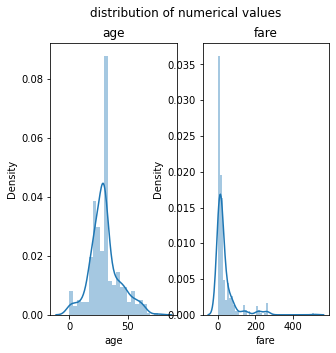

In [96]:
# look at the distribution states of our numeric variables

k=1
plt.figure(figsize=(5,5))
plt.tight_layout()
plt.suptitle("distribution of numerical values")


for i in test.loc[:,num_list2]:
    plt.subplot(1,2,k)   
    sns.distplot(test[i])
    plt.title(i)
    k+=1

In [97]:
# the outlier with boxplot

for i in test.loc[:,num_list2]:
    Q1 = test[i].quantile(0.25)
    Q3 = test[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if test[(test[i] > up) | (test[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")


age yes
fare yes


In [98]:
def outliers_test(data):
    q1,q3=np.percentile(data,[25,75])
    ıqr=q3-q1
    low,high=q1-1.5*(ıqr),q3+1.5*(ıqr)
    outliers_test=[i for i in data if i<low or i>high]
    return outliers_test

In [99]:
outliers_test(train["age"])

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

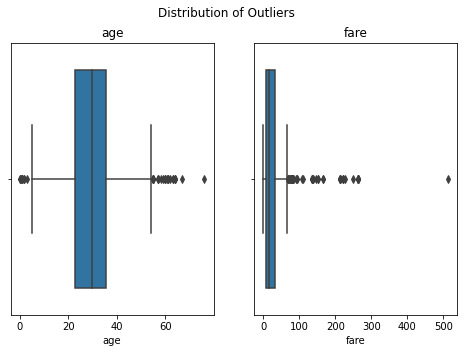

In [100]:
# visualize;
k=1
plt.figure(figsize=(8,5))
plt.suptitle("Distribution of Outliers")

for i in test.loc[:,num_list2]:
    plt.subplot(1,2,k)
    sns.boxplot(x = i, data = test.loc[:,num_list2])
    plt.title(i)
    k+=1

## test data visualize

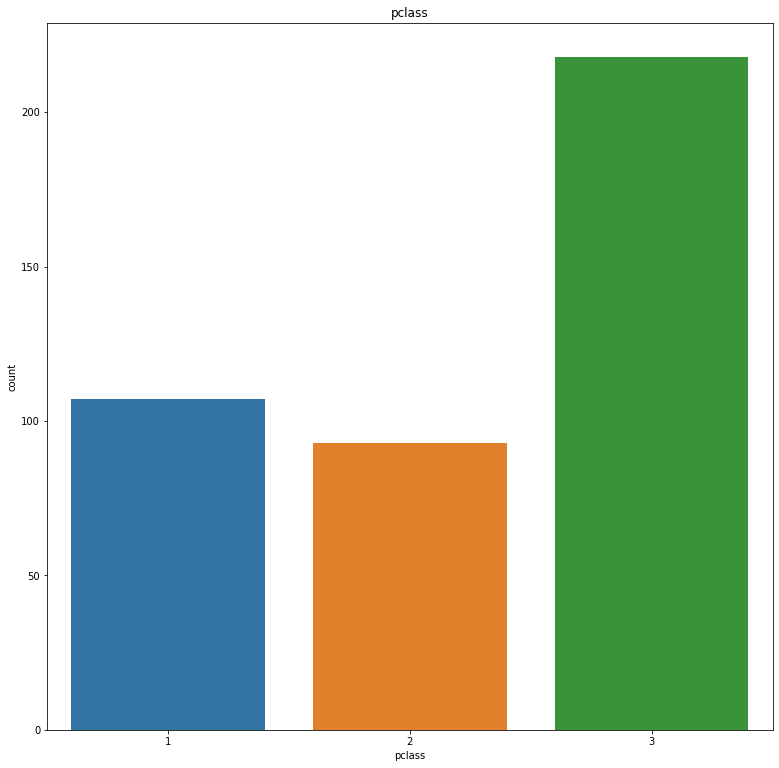

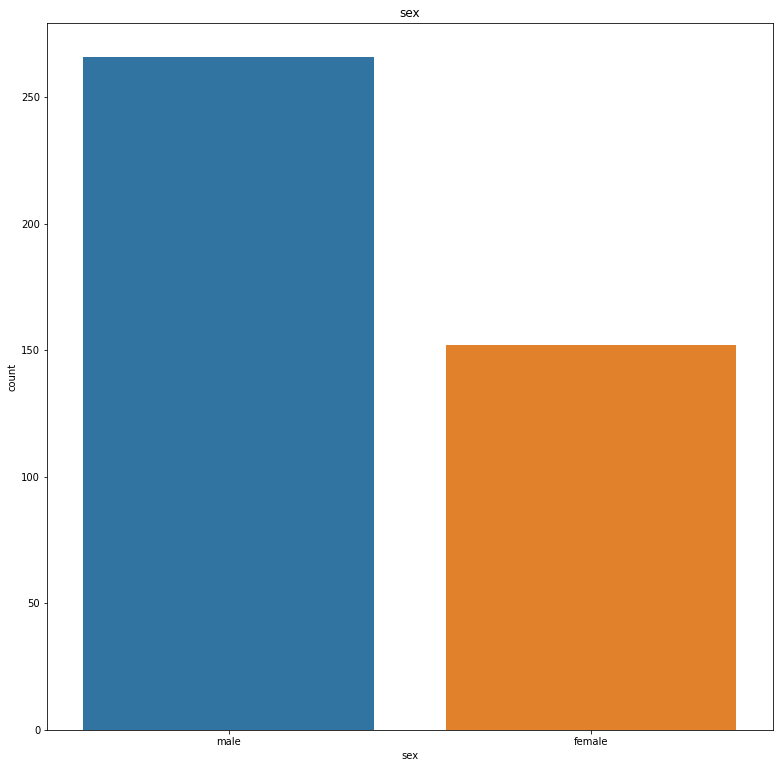

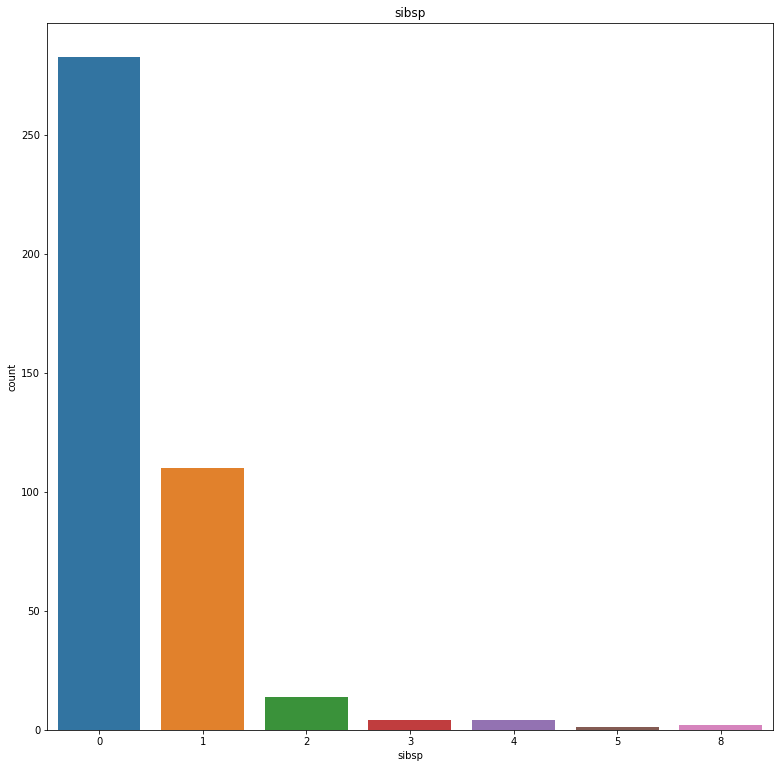

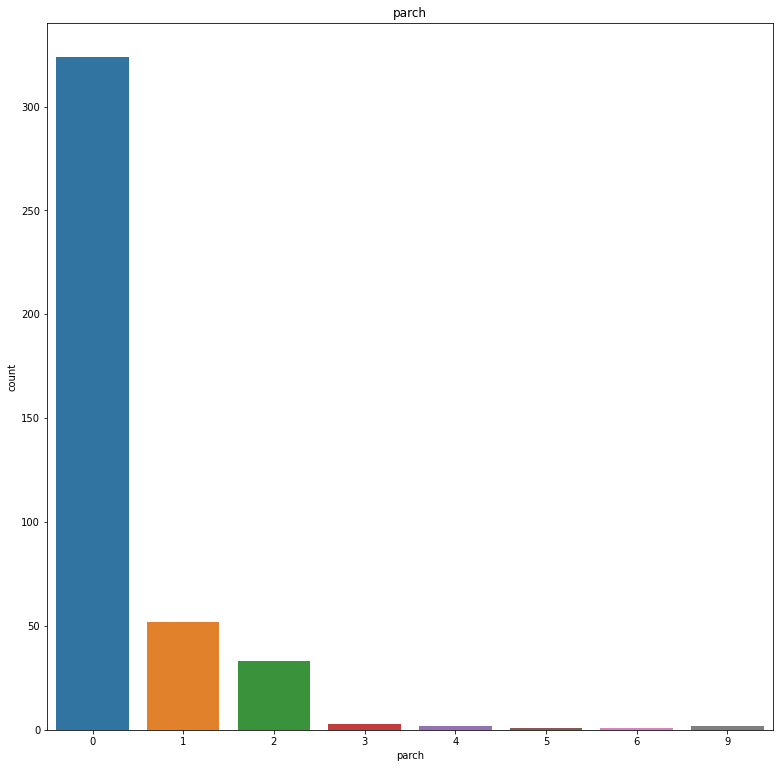

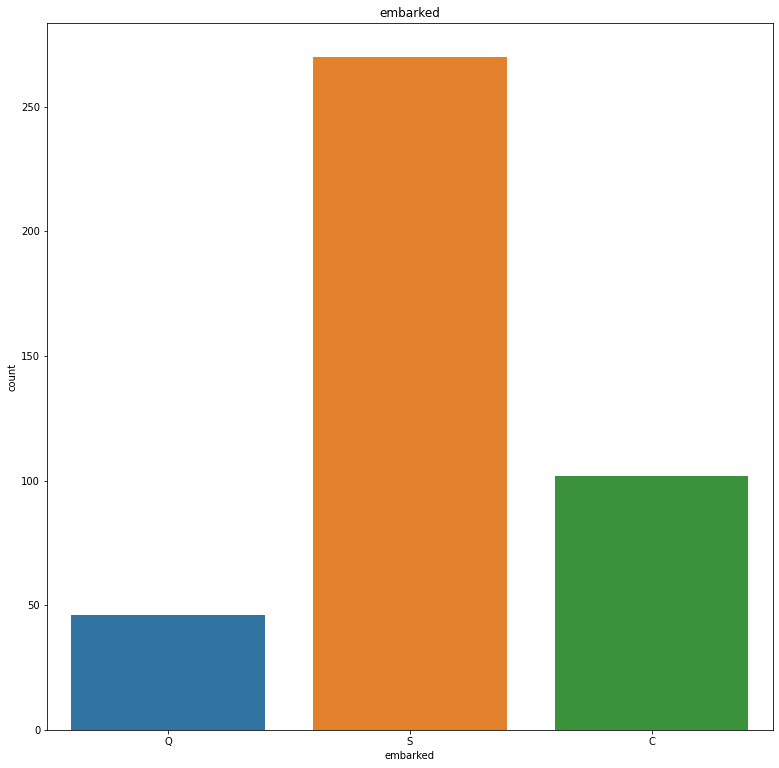

In [101]:
# categorial analysis
for i in cat_list2:
    
    plt.figure(figsize=(13,13))
    sns.countplot(x=i,data=test.loc[:,cat_list2])
    plt.title(i)

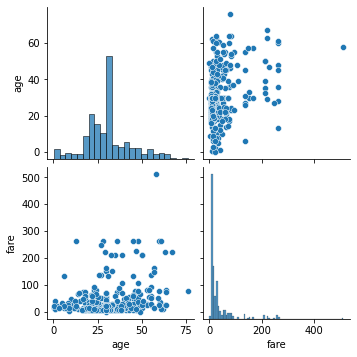

In [102]:
# numerical analysis
sns.pairplot(test.loc[:,num_list2]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba7479c730>,
      dtype=object)

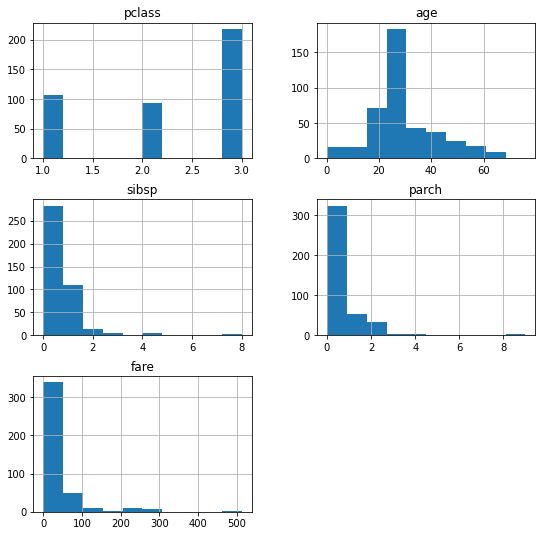

In [103]:
#histogram
test.hist(figsize=(9,9))

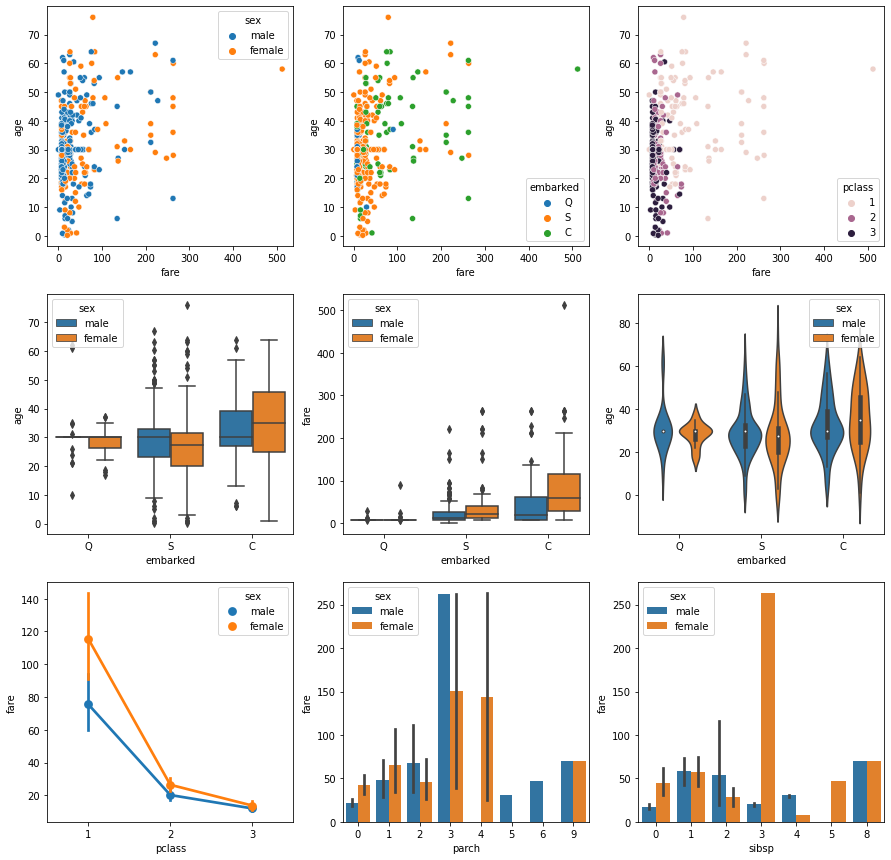

In [104]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='fare',y ='age',hue="sex",data = test)
plt.subplot(3,3,2)
sns.scatterplot(x="fare",y="age",hue="embarked",data=test)
plt.subplot(3,3,3)
sns.scatterplot(x="fare",y="age",hue="pclass",data=test)
plt.subplot(3,3,4)
sns.boxplot(x ='embarked',y ='age',hue="sex",data = test)
plt.subplot(3,3,5)
sns.boxplot(x="embarked",y="fare",hue="sex",data=test)
plt.subplot(3,3,6)
sns.violinplot(x="embarked",y="age",hue="sex",data=test)
plt.subplot(3,3,7)
sns.pointplot(x ='pclass',y ='fare',hue="sex",data = test)
plt.subplot(3,3,8)
sns.barplot(x="parch",y="fare",hue="sex",data=test)
plt.subplot(3,3,9)
sns.barplot(x="sibsp",y="fare",hue="sex",data=test)
plt.show()

### encoding process for test

In [105]:
test.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34.5,0,0,7.8292,Q


In [106]:
test["sex"]=le.fit_transform(test["sex"])
test["embarked"]=le.fit_transform(test["embarked"])

In [107]:
test.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,34.5,0,0,7.8292,1


### test data corelation analysis

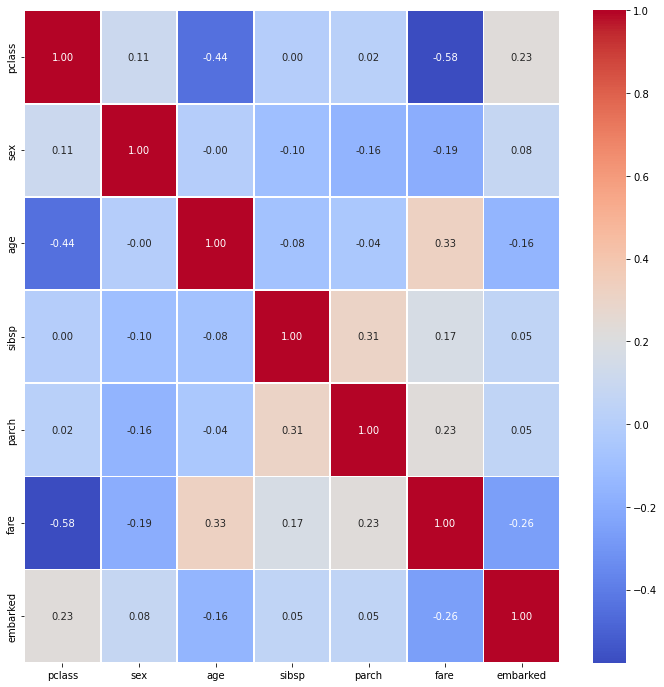

In [108]:
plt.figure(figsize=(12,12))
sns.heatmap(test.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

<a id="5"></a>
## 5.MODELLİNG

In [109]:
X_train=train.drop("survived",axis=1)
X_test=test
y_train=train["survived"]


In [110]:
!pip install catboost
!pip install lightgbm
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### Models

In [112]:
log=LogisticRegression().fit(X_train,y_train)
naiv=BernoulliNB().fit(X_train,y_train)
knn=KNeighborsClassifier().fit(X_train,y_train)
ada=AdaBoostClassifier().fit(X_train,y_train)
svm=SVC().fit(X_train,y_train)
mlpc=MLPClassifier().fit(X_train,y_train)
dtc=DecisionTreeClassifier().fit(X_train,y_train)
rf=RandomForestClassifier().fit(X_train,y_train)
xgb=XGBClassifier().fit(X_train,y_train)
gbm=GradientBoostingClassifier().fit(X_train,y_train)
lgb=LGBMClassifier().fit(X_train,y_train)
catbost=CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.009807
0:	learn: 0.6863480	total: 48ms	remaining: 47.9s
1:	learn: 0.6791088	total: 50ms	remaining: 25s
2:	learn: 0.6730850	total: 51.9ms	remaining: 17.2s
3:	learn: 0.6670438	total: 53.6ms	remaining: 13.3s
4:	learn: 0.6612073	total: 55.3ms	remaining: 11s
5:	learn: 0.6559150	total: 57ms	remaining: 9.44s
6:	learn: 0.6501681	total: 58.4ms	remaining: 8.28s
7:	learn: 0.6448017	total: 60.1ms	remaining: 7.45s
8:	learn: 0.6389826	total: 61.7ms	remaining: 6.79s
9:	learn: 0.6337959	total: 63.3ms	remaining: 6.27s
10:	learn: 0.6295247	total: 68.2ms	remaining: 6.13s
11:	learn: 0.6238293	total: 73.5ms	remaining: 6.05s
12:	learn: 0.6190677	total: 76.4ms	remaining: 5.8s
13:	learn: 0.6138199	total: 78.6ms	remaining: 5.53s
14:	learn: 0.6101620	total: 83.9ms	remaining: 5.51s
15:	learn: 0.6057390	total: 85.7ms	remaining: 5.27s
16:	learn: 0.6014454	total: 87.3ms	remaining: 5.05s
17:	learn: 0.5970315	total: 89ms	remaining: 4.85s
18:	learn: 0.5946634	total: 90.1ms	remaining: 4.65s
19:	l

In [113]:
models=[log,naiv,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

def ML(y,models):
    accuracy=models.score(X_train,y_train)
    return accuracy

In [114]:
for i in models:
     print(i,"Algorithm succed rate :",ML("survived",i))

LogisticRegression() Algorithm succed rate : 0.8002244668911336
BernoulliNB() Algorithm succed rate : 0.7856341189674523
KNeighborsClassifier() Algorithm succed rate : 0.8092031425364759
AdaBoostClassifier() Algorithm succed rate : 0.8305274971941639
SVC() Algorithm succed rate : 0.6868686868686869
MLPClassifier() Algorithm succed rate : 0.8159371492704826
DecisionTreeClassifier() Algorithm succed rate : 0.9797979797979798
RandomForestClassifier() Algorithm succed rate : 0.9797979797979798
XGBClassifier() Algorithm succed rate : 0.8754208754208754
GradientBoostingClassifier() Algorithm succed rate : 0.9012345679012346
LGBMClassifier() Algorithm succed rate : 0.941638608305275
<catboost.core.CatBoostClassifier object at 0x7fba76925d00> Algorithm succed rate : 0.9001122334455668


<a id="6"></a>
## 6.Decision TREE

In [115]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [116]:
dtc_params={
    "max_depth":[2,3,4,5,6,7,8],
    "min_samples_split":[8, 10, 15, 20],
    "min_samples_leaf":[1,2,3]
    
}

In [117]:
dtc_cv=GridSearchCV(dtc,dtc_params,cv=10,
                       n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


In [118]:
dtc_cv.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 15}

In [119]:
dtc_gs=DecisionTreeClassifier(**dtc_cv.best_params_).fit(X_train,y_train)


In [120]:
dtc_gs.score(X_train,y_train)

0.8630751964085297

In [121]:
scores_dtc=cross_val_score(dtc_gs,X_train,y_train,cv=10,scoring="accuracy")

In [122]:
acc_dtc=scores_dtc.mean()

In [123]:
acc_dtc

0.8328714107365792

In [124]:
#randomized search
dtc_params_rs={
    "max_depth":[2,3,4,5,6,7,8,9,10],
    "min_samples_split":np.arange(2,20),
    "min_samples_leaf":np.arange(2,20)
    
}

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
dtc_cv_rs=RandomizedSearchCV(dtc,dtc_params_rs,cv=10,
                       n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [127]:
dtc_cv_rs.best_params_

{'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 9}

In [128]:
dtc_rs=DecisionTreeClassifier(**dtc_cv_rs.best_params_).fit(X_train,y_train)


In [129]:
dtc_rs.score(X_train,y_train)

0.877665544332211

<a id="7"></a>
## 7.Random Forest

In [130]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [131]:
rf_params={
        "max_depth":[2,15],
        "n_estimators":[50,500],
        "min_samples_split":[2,10,15, 20],
        "min_samples_leaf":[1,2,3,4,5]
    }

In [132]:
rf_cv=GridSearchCV(rf,rf_params,cv=10,
                       n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


In [133]:
rf_cv.best_params_

{'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

In [137]:
model=RandomForestClassifier(**rf_cv.best_params_).fit(X_train,y_train)
acc=model.score(X_train,y_train)
acc 

0.8698092031425365

<a id="8"></a>
## 8.ANN

In [138]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping 

In [139]:
model=Sequential()

model.add(Dense(units=10,activation="relu")) 
model.add(Dense(units=5,activation="relu"))
model.add(Dense(units=5,activation="relu"))


model.add(Dense(units=1,activation="sigmoid")) 

model.compile(loss="binary_crossentropy",optimizer="adam")

In [140]:
earlystopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)  

In [141]:
model.fit(x=X_train,y=y_train,epochs=700,validation_data=(X_train,y_train),
          verbose=1,callbacks=[earlystopping])

Epoch 1/700
28/28 [==============================] - 1s 12ms/step - loss: 0.6916 - val_loss: 0.6322
Epoch 2/700
28/28 [==============================] - 0s 5ms/step - loss: 0.6267 - val_loss: 0.6137
Epoch 3/700
28/28 [==============================] - 0s 5ms/step - loss: 0.6146 - val_loss: 0.6094
Epoch 4/700
28/28 [==============================] - 0s 5ms/step - loss: 0.6094 - val_loss: 0.6079
Epoch 5/700
28/28 [==============================] - 0s 5ms/step - loss: 0.6078 - val_loss: 0.6062
Epoch 6/700
28/28 [==============================] - 0s 5ms/step - loss: 0.6085 - val_loss: 0.6047
Epoch 7/700
28/28 [==============================] - 0s 6ms/step - loss: 0.6049 - val_loss: 0.6029
Epoch 8/700
28/28 [==============================] - 0s 5ms/step - loss: 0.6033 - val_loss: 0.6012
Epoch 9/700
28/28 [==============================] - 0s 5ms/step - loss: 0.6016 - val_loss: 0.5997
Epoch 10/700
28/28 [==============================] - 0s 4ms/step - loss: 0.6007 - val_loss: 0.5986
Epoch 11

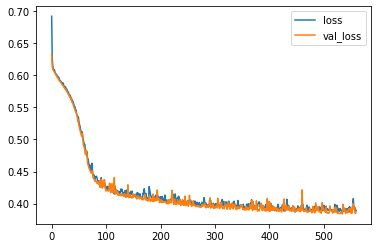

In [142]:
model_lc=pd.DataFrame(model.history.history)
model_lc.plot()

<a id="9"></a>
## 9.Conclusion 

 * After performing the necessary preprocessing on Train and test datasets, we tried to increase the success of the models by comparing various optimization techniques. we compared traditional machine learning models beforehand. we performed optimization processes for Decision Tree and Random Forest, which gave the highest success rate. The highest success rate was 97%. It gave a result of .8, and finally we tested our model for the ANN algorithm (deep learning algorithm).

